In [8]:
import os
import math
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
df=pd.read_csv("./datcw_na.csv")                              # reread csv so we start from scratch 
df = df.fillna(df['X3'].mean())                               # replace nan values with mean of X
cat_encoder = OneHotEncoder()                                 # One hot encode category x0
x0_encoded = cat_encoder.fit_transform(df[['X0']])
x0_encoded = pd.DataFrame( x0_encoded.toarray() )
x0_encoded.columns = [c for c in cat_encoder.categories_[0]]
df = pd.concat([df,x0_encoded],axis=1).drop(columns='X0')     # add encoded columns
scaler = StandardScaler()
df                                                            # inspect

,X1,X2,X3,X4,X5,X6,X7,X8,Y,C1,C2,C3
0,1.19,622.55,321.102527,89.31,7.00,1.98,0.00,0.00,15.55,0.0,0.0,1.0
1,1.19,622.55,323.400000,109.15,7.70,3.00,0.00,0.00,15.55,1.0,0.0,0.0
2,0.88,463.05,291.060000,99.23,5.67,4.40,0.00,0.00,15.55,1.0,0.0,0.0
3,0.79,509.36,291.060000,121.28,6.30,4.05,0.00,0.00,15.55,0.0,1.0,0.0
4,0.89,507.15,385.390000,121.28,7.70,2.00,0.00,0.00,20.84,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.52,948.64,277.830000,218.30,4.24,4.95,0.48,4.05,17.88,0.0,0.0,1.0
764,0.50,727.65,321.102527,266.80,3.47,1.98,0.44,5.00,16.54,0.0,1.0,0.0
765,0.68,889.35,404.250000,178.60,3.47,2.43,0.40,4.95,16.44,1.0,0.0,0.0
766,0.50,654.88,363.820000,218.30,3.15,3.96,0.36,4.50,16.48,0.0,0.0,1.0


In [15]:
attributes = ["X1", "X2", "X3","X4", "X5", "X6", "X7","X8"]
#scatter_matrix(df[attributes], figsize=(12, 12))
#plt.show()

In [5]:
# Split for testing and training with 30% for training
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)
X_test = test_set.drop(columns='Y')                                  # x test
X_train = train_set.drop(columns='Y')                                # x train
y_test = test_set['Y']                                               # y test
y_train = train_set['Y']                                             # y train
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))    # standard scalar
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))      # standard scalar

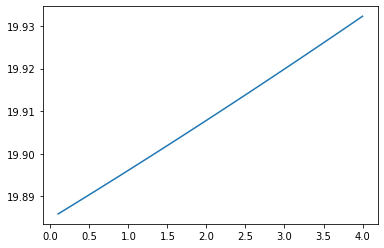

In [49]:
mses=[]
rmses=[]
alphas=[]

for i in np.linspace(0.1,4,100):
    ridge_reg = Ridge(alpha=i)
    ridge_reg.fit(X_train_scaled, y_train)
    y_ridge_pred = ridge_reg.predict(X_test_scaled)
    ridge_mse = mean_squared_error(y_test, y_ridge_pred)
    mses.append(ridge_mse)
    alphas.append(i)
    rmses.append(math.sqrt(ridge_mse))

plt.plot(alphas,mses)
plt.show()

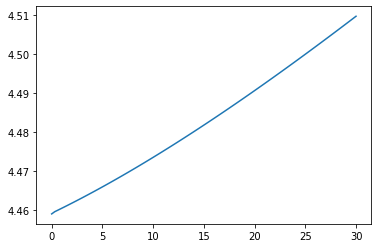

In [46]:
plt.plot(alphas,rmses)
plt.show()

In [58]:
from sklearn.linear_model import RidgeCV
regr_cv = RidgeCV(alphas=[0.01, 1.0, 10.0])
model_cv = regr_cv.fit(X_train_scaled, y_train)
print(model_cv.alpha_)
y_ridge_cv= model_cv.predict(X_test_scaled)
mean_squared_error(y_test, y_ridge_cv)

10.0


20.012681308536187